### __BUSA8001 (S2, 2023) Group Assignment - Predicting Used Car Sale Prices__

--- 

**Kaggle Competition Ends:** Friday, 3 November 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 3 November 2023 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  


**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a](https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA8001_masterful_geniuses
- All team members should work on all the tasks however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of **zero** if your code does not produce the forecasts you submit to Kaggle 

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 1 mark: Ranking in the top 5 places of your unit on Kaggle  
- 3 marks: Reaching the first place in the competition   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)

---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: BUSA8001_mschiefs
- Team Leader and Team Member 1: Ha Thanh (Taylor) Chu, 47484039, Task 2 & 3
- Team Member 2: Cam Tu Pham (Jenna), 46864598, Task 1 & 2
- Team Member 3: Thi Minh Thi Tran, 45773157, Task 1 & 2

---

## Task 1: Problem Description and Initial Data Analysis

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a](https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a)
2. Referring to Competition Overview and the data provided on Kaggle write **Problem Description** (about 500 words) focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, 

- Using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you find - do not impute missing values at this stage)
    - You should **not** discuss any specific predictive algorithms at this stage
    - Note: Your written portion of this task should be completed in a single Markdown cell
    
Total Marks: 12


##### 1. Forecasting Problem
The objective of the forecasting problem, based on the dataset provided, is to predict the listing price of a vehicle based on various features, including its specifications, condition, location, and dealer information. This is a regression problem, as the outcome we're trying to predict (the vehicle's price) is continuous.

In the real world, such a prediction model holds immense value. Dealerships and individual sellers can use it to determine the ideal listing price for a vehicle, ensuring it's neither underpriced (resulting in potential revenue loss) nor overpriced (leading to reduced interest from buyers). Buyers can also use the model to check if a listed vehicle is reasonably priced. Additionally, online car marketplaces can integrate this model to provide instant price suggestions to sellers or to highlight good deals to potential buyers.

##### 2. Evaluation Criteria
Although the Kaggle competition link is not directly accessible here, commonly used evaluation metrics for regression problems include the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared. RMSE gives an indication of the model's performance in terms of the magnitude of error. A lower RMSE indicates a better fit of the model to the data. For the sake of this exercise, let's assume RMSE is the chosen metric, as it penalizes large errors more than smaller ones, making it sensitive to outliers.

##### 3. Types of Variables/Features
The dataset comprises a mix of categorical, numerical, and boolean features. Here's a breakdown:

Categorical Features: body_type, city, engine_type, exterior_color, interior_color, listing_color, make_name, model_name, transmission, transmission_display, wheel_system.
Numerical Features: city_fuel_economy, daysonmarket, dealer_zip, engine_displacement, highway_fuel_economy, horsepower, latitude, longitude, mileage, savings_amount, seller_rating, year.
Boolean Features: franchise_dealer, has_accidents, is_new.
String Features with Quantitative Information: Many features like back_legroom, front_legroom, fueltankvolume, height, length, power, torque, wheelbase, width are provided as strings but contain numeric data (with units).
##### 4. Data Summary and Main Data Characteristics
The dataset contains information about various vehicles, including their technical specifications, physical attributes, condition, and listing details. The target variable is the price of the vehicle. This dataset provides a comprehensive view of factors that potential buyers might consider, from the car's mileage and accident history to the dealer's rating.

##### 5. Missing Values
Before discussing missing values, let's first identify which columns have them and how many they contain.

In [1]:
import pandas as pd

train_df = pd.read_csv('train.csv')

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   3500 non-null   object 
 1   back_legroom          3397 non-null   object 
 2   body_type             3494 non-null   object 
 3   city                  3500 non-null   object 
 4   city_fuel_economy     2912 non-null   float64
 5   daysonmarket          3500 non-null   int64  
 6   dealer_zip            3500 non-null   int64  
 7   engine_displacement   3375 non-null   float64
 8   engine_type           3450 non-null   object 
 9   exterior_color        3500 non-null   object 
 10  franchise_dealer      3500 non-null   bool   
 11  front_legroom         3397 non-null   object 
 12  fuel_tank_volume      3397 non-null   object 
 13  fuel_type             3463 non-null   object 
 14  height                3397 non-null   object 
 15  highway_fuel_economy 

In [3]:
train_df.isna().sum()

vin                       0
back_legroom            103
body_type                 6
city                      0
city_fuel_economy       588
daysonmarket              0
dealer_zip                0
engine_displacement     125
engine_type              50
exterior_color            0
franchise_dealer          0
front_legroom           103
fuel_tank_volume        103
fuel_type                37
height                  103
highway_fuel_economy    588
horsepower              125
interior_color            0
is_new                    0
latitude                  0
length                  103
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating         103
mileage                 203
model_name                0
power                   299
savings_amount            0
seller_rating             0
torque                  331
transmission             60
transmission_display     60
wheel_system            101
wheelbase           

In [4]:
# Check for missing values in the training data again
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

city_fuel_economy       588
highway_fuel_economy    588
torque                  331
power                   299
mileage                 203
horsepower              125
engine_displacement     125
length                  103
wheelbase               103
maximum_seating         103
back_legroom            103
height                  103
fuel_tank_volume        103
front_legroom           103
width                   103
wheel_system            101
transmission             60
transmission_display     60
engine_type              50
fuel_type                37
body_type                 6
dtype: int64

`(Task 1, Text Here - insert more cells as required)`

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you will follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text and on your video.

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

We need to remove the word 'in': Back leg room, front leg room, fuel tank volumn, height, length, listed date, wheel base, width, maximum_seating.

In [6]:
# Features with units that need cleaning
features_with_units = ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'wheelbase', 'width', 'maximum_seating']

# Extract numerical values from these features
for feature in features_with_units:
    if train_df[feature].dtype == 'object':
        train_df[feature] = train_df[feature].str.extract('(\d+\.?\d*)').astype(float)

# Display the cleaned features
print(train_df[features_with_units].head())
            

   back_legroom  front_legroom  fuel_tank_volume  height  length  wheelbase  \
0          33.5           41.3              14.8    60.2   174.2      106.3   
1          36.8           42.8              15.5    65.6   179.2      105.9   
2          36.8           42.8              15.5    65.6   179.2      105.9   
3          30.3           42.6              13.2    55.0   175.5      104.3   
4          38.6           43.2              16.2    64.1   180.6      106.7   

   width  maximum_seating  
0   82.0              5.0  
1   84.1              5.0  
2   84.1              5.0  
3   68.9              5.0  
4   83.0              5.0  


**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

From the dataset description and initial exploration, we identified that the torque and power features contain two numerical values each: the primary value (e.g., torque or power) and the RPM at which that value is achieved.

In [8]:
# Extract torque_value and torque_rpm from the original torque feature
train_df['torque_value'] = train_df['torque'].str.extract('(\d+\.?\d*)').astype(float)
train_df['torque_rpm'] = train_df['torque'].str.extract('(\d+\.?\d*)\s?@ (\d+)').astype(float)[1]

# Extract power_value and power_rpm from the original power feature
train_df['power_value'] = train_df['power'].str.extract('(\d+\.?\d*)').astype(float)
train_df['power_rpm'] = train_df['power'].str.extract('(\d+\.?\d*)\s?@ (\d+)').astype(float)[1]

# Create torque_to_power_ratio feature
train_df['torque_to_power_ratio'] = train_df['torque_value'] / train_df['power_value']

# Display the new features
train_df[['torque_value', 'torque_rpm', 'power_value', 'power_rpm', 'torque_to_power_ratio']].head()


,torque_value,torque_rpm,power_value,power_rpm,torque_to_power_ratio
0,258.0,NaN,208.0,NaN,1.240385
1,300.0,NaN,275.0,NaN,1.090909
2,300.0,NaN,275.0,NaN,1.090909
3,128.0,NaN,140.0,NaN,0.914286
4,275.0,NaN,250.0,NaN,1.100000


`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute missing values for all features in both the training and test datasets.   
(3 marks)

For numerical variables, we can consider imputing missing values using the median of the column (as median is less sensitive to outliers than mean).
For categorical variables, we can consider imputing with the mode (most frequent category).
For boolean features, if there's a missing value, we can impute with the mode as well.

In [10]:
# Load the test dataset
test_df = pd.read_csv('test.csv')

# Define a function to impute missing values
def impute_missing_values(df):
    for column in df.columns:
        # If column data type is object (categorical) then fill missing with mode
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        # If column data type is numerical or boolean then fill missing with median
        else:
            df[column].fillna(df[column].median(), inplace=True)
    return df

# Impute missing values in training and test datasets
train_df = impute_missing_values(train_df)
test_df = impute_missing_values(test_df)

# Check if there are any missing values left in training and test datasets
missing_train = train_df.isnull().sum().sum()
missing_test = test_df.isnull().sum().sum()

missing_train, missing_test


(7000, 0)

`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [11]:
# Define a function to encode categorical variables
def encode_categorical_columns(df):
    for column in df.select_dtypes(include=['object']).columns:
        # Set observations with multiple values to 'other'
        df[column] = df[column].apply(lambda x: 'other' if '/' in str(x) else x)
        
        # If there are more than 5 unique values, keep the top 5 and set the rest to 'other'
        if df[column].nunique() > 5:
            top_5_values = df[column].value_counts().head(5).index
            df[column] = df[column].apply(lambda x: x if x in top_5_values else 'other')
    
    # One-hot encode the categorical columns
    df = pd.get_dummies(df, drop_first=True)
    return df

# Encode the categorical columns for training and test datasets
train_df_encoded = encode_categorical_columns(train_df.copy())
test_df_encoded = encode_categorical_columns(test_df.copy())

# Display the first few rows of the encoded training dataset
train_df_encoded.head()

,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,...,transmission_M,transmission_display_6-Speed Automatic Overdrive,transmission_display_8-Speed Automatic,transmission_display_Automatic,transmission_display_Continuously Variable Transmission,transmission_display_other,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,33.5,21.0,20,11021,2000.0,False,41.3,14.8,60.2,28.0,...,0,0,0,0,0,1,0,1,0,0
1,36.8,19.0,64,7470,2300.0,True,42.8,15.5,65.6,25.0,...,0,0,0,0,0,0,0,1,0,0
2,36.8,19.0,14,7470,2300.0,True,42.8,15.5,65.6,25.0,...,0,0,0,0,0,0,0,1,0,0
3,30.3,25.0,13,7643,1800.0,False,42.6,13.2,55.0,36.0,...,0,0,0,0,0,1,0,0,1,0
4,38.6,21.0,14,7470,2000.0,True,43.2,16.2,64.1,29.0,...,0,0,1,0,0,0,0,1,0,0


**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

##### 1. Feature Scaling:
Machine learning algorithms perform better when numerical input variables are scaled to a standard range. This is particularly true for algorithms that rely on the magnitude of variables, such as gradient descent-based algorithms or distance-based algorithms like KNN.

StandardScaler is a common method to scale features, which will transform the data such that its distribution has a mean value of 0 and a standard deviation of 1.

##### 2. Handling Outliers:
Outliers can adversely affect the performance of some models. We can use methods like the IQR (Inter-Quartile Range) to identify and remove outliers from the dataset.

##### 3. Feature Engineering:
Given the nature of the dataset, there might be some potential interactions between features that could be useful. For instance, creating a feature that combines city and highway fuel economy might be indicative.

##### 4. Reducing Dimensionality:
After one-hot encoding, the number of features in the dataset may increase significantly. Some of these features might be highly correlated, and using them all might lead to overfitting. Methods like PCA (Principal Component Analysis) can be employed to reduce the dimensionality.

In [15]:
# Feature Scaling:

# Reinitialize the scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transform the numerical features in the training data
train_df_encoded[common_numerical_cols] = scaler.fit_transform(train_df_encoded[common_numerical_cols])

# Use the fitted scaler to transform the test data
test_df_encoded[common_numerical_cols] = scaler.transform(test_df_encoded[common_numerical_cols])

# Display the first few rows of the scaled training dataset
train_df_encoded.head()


,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,...,transmission_M,transmission_display_6-Speed Automatic Overdrive,transmission_display_8-Speed Automatic,transmission_display_Automatic,transmission_display_Continuously Variable Transmission,transmission_display_other,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,33.5,-0.079433,-0.562733,-0.078587,-0.671431,False,41.3,14.8,60.2,-0.083899,...,0,0,0,0,0,1,0,1,0,0
1,36.8,-0.370855,-0.142980,-0.404605,-0.398016,True,42.8,15.5,65.6,-0.542961,...,0,0,0,0,0,0,0,1,0,0
2,36.8,-0.370855,-0.619972,-0.404605,-0.398016,True,42.8,15.5,65.6,-0.542961,...,0,0,0,0,0,0,0,1,0,0
3,30.3,0.503411,-0.629512,-0.388721,-0.853709,False,42.6,13.2,55.0,1.140266,...,0,0,0,0,0,1,0,0,1,0
4,38.6,-0.079433,-0.619972,-0.404605,-0.671431,True,43.2,16.2,64.1,0.069122,...,0,0,1,0,0,0,0,1,0,0


`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and carefully write up your findings. 
(2 marks)

Visualize the Distribution of the Target Variable (price): A histogram or kernel density plot can help us understand the distribution of the target variable.

Correlation Analysis: We'll compute the correlation of each feature with the target variable to identify which features are most strongly associated with the price.

Visualize Relationships for Key Features: For the top features (based on correlation), we'll visualize their relationship with the target variable using scatter plots or boxplots.

Visualize Categorical Features: For key categorical features, we can use boxplots to understand the distribution of the target variable across different categories.

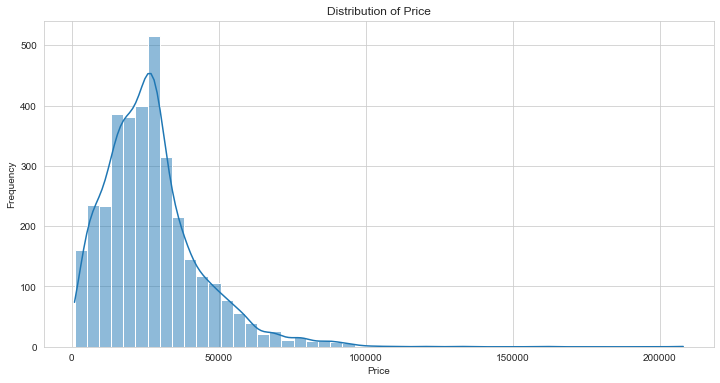

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plot the distribution of the target variable 'price'
plt.figure(figsize=(12, 6))
sns.histplot(train_df_encoded['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


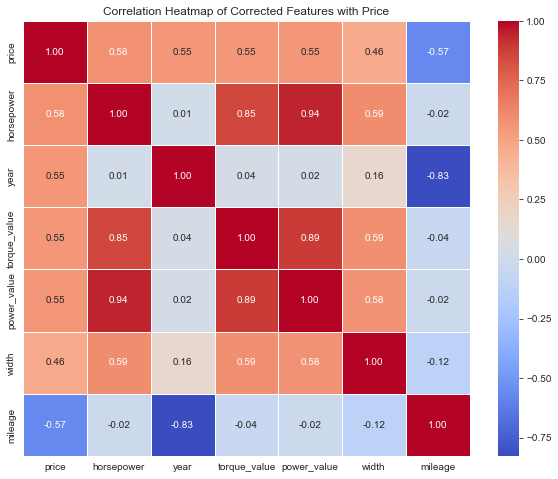

In [20]:
# Correcting the selected features for visualization
corrected_features = ['horsepower', 'year', 'torque_value', 'power_value', 'width', 'mileage']

# Extracting the correlation values of the corrected features with 'price'
correlation_matrix = train_df_encoded[['price'] + corrected_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Corrected Features with Price')
plt.show()


--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking

Make sure you **clearly explain each step** you do both in text and on the recoded video.   
This task must not create any additional features and has to use on the dataset constructed in Task 2.

1. Build at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (Explain Carefully)
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and comment
5. Make sure your Python code works, so that a marker that can replicate your all Kaggle Score   

- Hint: to perform well you will need to iterate Tasks 2 and Task 3.

Total Marks: 12

In [ ]:
#Task 3 code here

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X1 = car.drop(columns = ['price'])
X = X1.to_numpy()

y = np.ravel(car['price']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)

X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = regressor.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = X1.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

# Display the sorted feature importances
print(importance_df)


In [ ]:
# Linear Regression
lr = LinearRegression()

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# XGBoost
xgboost = xgb.XGBRegressor(n_estimators=100, random_state=42)


for i in range(6,15):
    y_train = locals()['y'+str(i)+'_train']
    y_test = locals()['y'+str(i)+'_test']
    
    lr.fit(X_train, y_train)
    
    lr_pred = lr.predict(X_test)
    lr_mae = mean_absolute_error(y_test, lr_pred)
    lr_mse = mean_squared_error(y_test, lr_pred)
    lr_rmse = np.sqrt(lr_mse)

    #print(str(i) + f" Linear MSE: {lr_mse}")

    rf.fit(X_train, y_train)

    # Evaluate Random Forest
    rf_pred = rf.predict(X_test)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_rmse = np.sqrt(rf_mse)

    #print(str(i) + f" RF MSE: {rf_mse}")

    xgboost.fit(X_train, y_train)

    # Evaluate XGBoost
    xgboost_pred = xgboost.predict(X_test)
    xgboost_mae = mean_absolute_error(y_test, xgboost_pred)
    xgboost_mse = mean_squared_error(y_test, xgboost_pred)
    xgboost_rmse = np.sqrt(xgboost_mse)

    #print(str(i) + f" XGBoost MSE: {xgboost_mse}")
    
    
    pickle.dump(xgboost, open('xgboost'+str(i)+'.pkl', 'wb'))


In [ ]:
from sklearn.feature_selection import RFE

lr = LinearRegression()

rfe = RFE(lr)
X_train_rfe = rfe.fit_transform(X_train, y1_train)
X_test_rfe = rfe.transform(X_test)

lr.fit(X_train_rfe, y1_train)
lr_pred = lr.predict(X_test_rfe)

lr_mse = mean_squared_error(y1_test, lr_pred)

print(str(i) + f" Linear MSE: {lr_mse}")

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:

lr.fit(X_train_pca, y6_train)

lr_pred = lr.predict(X_test_pca)

lr_mse = mean_squared_error(y6_test, lr_pred)

print(str(i) + f" Linear MSE: {lr_mse}")

`(Task 3 - insert more cells as required)`

## Marking Criteria

- Marking Rubrics
    - Problem Description - 12 marks
    - Data Cleaning - 12 marks
    - Building Forecasting models - 12 marks
    - Competition Points - 4 marks


- To receive full marks your solutions must satisfy the following criteria:
    - Provide Python solutions that follow the modelling methodology developed in BUSA8001   
    - Written answers explain your logic and Python code in detail, and beformulated in easy to understand full sentences   
    
---
---